# HiMCM Session 6
# Linear Regression Model


A **linear relationship** between two variables is one in which the scatterplot of them looks roughly like a line.  **Linear regression** is a method for modelling how a **dependent variable** linearly depends on one or more **independent variables**.  The dependent variable (also called a **response variable** and many other things) is what we are trying to model or predict, and is usually denoted $Y$.  The independent variables (also called **explanatory** or **input variables**) are the information we are using to make the predictiong, and are usually denoted $X_1, X_2, ...$.

The linear relationship is: $$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n + \epsilon$$
where $\epsilon$ (epsilon) represents the error.

Here, $Y, X_1, X_2, ..., X_n$ are *random variables* that can take different values with different probabilities.

Linear regression finds the coefficients $\beta_0, \beta_1, ..., \beta_n$ so that the sum of the squares of the error term for each data observation is minimized.

## A Toy Example

In [1]:
import pandas as pd # data analysis library

In [2]:
# Generate a toy data set
grades = pd.DataFrame({"HomeworkAvg": [65, 78, 93, 59, 82],
                       "FinalExam": [70, 75, 95, 64, 79]})
grades

,HomeworkAvg,FinalExam
0,65,70
1,78,75
2,93,95
3,59,64
4,82,79


In [3]:
import matplotlib.pyplot as plt # plotting library

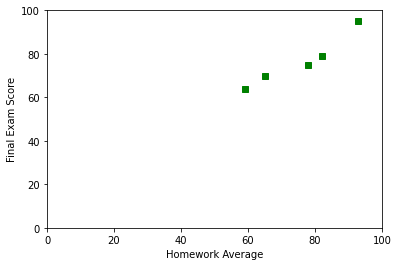

In [4]:
plt.plot(grades["HomeworkAvg"], grades["FinalExam"], "gs")
plt.xlabel("Homework Average")
plt.ylabel("Final Exam Score")
plt.ylim([0, 100])
plt.xlim([0, 100])
plt.show()

Now, use a line to represent the relationship.

[  0. 110.]


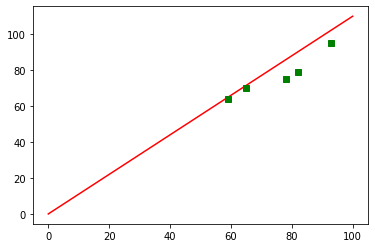

In [5]:
# Let's find a line using intuition.
# y = mx + b, m --> slope, b --> y-intercept
# A reasonable guess is b = 0, m = 1.1
# Proposed model: y = 1.1x

# visualize the proposed model:
# x_coordinates = [0, 100]
# y_coordinates = [0, 110]
# y_coordinates = []
# for x in x_coordinates:
#     y = 1.1 * x
#     y_coordinates.append(y)
# print(y_coordinates)

# use numpy arrays to simplify the calculation
import numpy as np # library for numerical computations
x_coordinates = np.array([0, 100])
y_coordinates = x_coordinates * 1.1
print(y_coordinates)
# draw a red line representing y = 1.1x.

plt.plot(x_coordinates, y_coordinates, "r-")
plt.plot(grades["HomeworkAvg"], grades["FinalExam"], "gs")
plt.show()
# This line is not very close to the points
# All points lie below the line

In [6]:
# Introduce a quantitative measure of fitness.
# measure = the total error on the data points.
# Point 1: x = 65, y = 70, prediction = 1.1 * 65 = 71.5 error = 70 - 71.5 = -1.5
# Aggregate all prediction errors:
# Mean-absolute-error: the average of absolute values of the errors.
# Mean-squared-error: the average of the squares of error.

# Let's calcuate the MSE of the model y = 1.1x.
grades["Prediction"] = grades["HomeworkAvg"] * 1.1
grades["SquaredError"] = (grades["Prediction"] - grades["FinalExam"]) ** 2
grades

,HomeworkAvg,FinalExam,Prediction,SquaredError
0,65,70,71.5,2.25
1,78,75,85.8,116.64
2,93,95,102.3,53.29
3,59,64,64.9,0.81
4,82,79,90.2,125.44


In [7]:
MSE = np.mean(grades["SquaredError"])
print("Mean Squared Error:", MSE)

Mean Squared Error: 59.68600000000009


## How to Minimize the MSE?

Let's introduce some notations:
- Data: 
    - The first row is denoted $(x_1, y_1)$
    - The i-th row is denoted $(x_i, y_i)$
    - The last row is denoted $(x_n, y_n)$
- Model: $y = mx + b$

Now we can express the mean-squared-error function as:
$$MSE(m, b) = \frac{1}{n}\big((mx_1 + b - y_1) ^ 2 + (mx_2 + b - y_2) ^ 2 + ... + (mx_n + b - y_n) ^ 2\big)$$
Or
$$MSE(m, b) = \frac{1}{n}\sum_{i=1}^n(mx_i + b - y_i) ^ 2$$

Goal:
- Find values of m and b so that MSE is minimal.
- Find the critical points of the function. 
- Find m and b so that $\frac{\partial MSE}{\partial m} = \frac{\partial MSE}{\partial b} = 0$
- The solution is called the **normal equation** 

![](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-0374abb9d92352e297b8a55567752306_l3.svg)

- X: the first column is filled with 1's, the second column is filled with $x_i$'s.
- y: a single-column matrix filled with $y_i$'s

In [ ]:
temp = [[1, 2, 3],
        [2, 3, 4]]
print(temp)

In [ ]:
# Apply the normal equation.
X = np.array([[1, 65],
              [1, 78],
              [1, 93],
              [1, 59],
              [1, 82]])
y = np.array([[70],
              [75],
              [95],
              [64],
              [79]])
solution = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
print(solution)

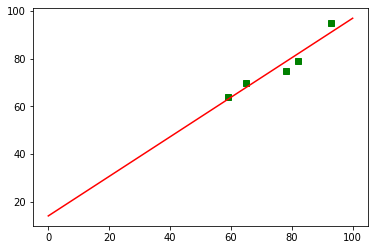

In [8]:
b = 14.128
m = 0.828
plt.plot(grades["HomeworkAvg"], grades["FinalExam"], "gs")
x_coordiantes = np.array([0, 100])
y_coordinates = x_coordiantes * m + b
plt.plot(x_coordiantes, y_coordinates, "r-")
plt.show()

**Use `statsmodels` library to perform linear regression**

In [9]:
import statsmodels.formula.api as smf

lm = smf.ols('FinalExam ~ HomeworkAvg', grades).fit()

In [10]:
lm.params

Intercept      14.128052
HomeworkAvg     0.828540
dtype: float64

In [11]:
lm.fittedvalues

0    67.983180
1    78.754205
2    91.182311
3    63.011937
4    82.068367
dtype: float64

In [12]:
lm.summary()

C:\Users\lzhao\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FinalExam   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     35.20
Date:                Sat, 26 Jun 2021   Prob (F-statistic):            0.00957
Time:                        21:54:35   Log-Likelihood:                -12.482
No. Observations:                   5   AIC:                             28.96
Df Residuals:                       3   BIC:                             28.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      14.1281     10.665      1.325      0.277     -19.812      48.068
HomeworkAvg     0.8285      0.140      5.933      0.010       0.384       1.273
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.669
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.555
Skew:                          -0.134   Prob(JB):                        0.758
Kurtosis:                       1.390   Cond. No.                         480.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Performance analysis**: How accurate is the linear model?

- How much better is this model comparing to predicting using the average of exam scores?
- Use additional data to test the performance.

In [22]:
avg_exam_score = np.mean(grades['FinalExam'])
print(avg_exam_score)

grades["y_avg"] = avg_exam_score
grades

grades["(FinalExam - Prediction)^2"] = \
    (grades['FinalExam'] - lm.fittedvalues) ** 2

grades["(FinalExam - y_avg)^2"] = (grades['FinalExam'] - grades['y_avg']) ** 2
grades

r_squared = 1 - np.sum(grades["(FinalExam - Prediction)^2"]) / np.sum(grades["(FinalExam - y_avg)^2"])
print(r_squared)

76.6
0.9214721240069411


In [23]:
grades

,HomeworkAvg,FinalExam,Prediction,SquaredError,y_avg,(Prediction - y_avg)^2,(FinalExam - y_avg)^2,(FinalExam - Prediction)^2
0,65,70,71.5,2.25,76.6,26.01,43.56,4.067565
1,78,75,85.8,116.64,76.6,84.64,2.56,14.094056
2,93,95,102.3,53.29,76.6,660.49,338.56,14.574746
3,59,64,64.9,0.81,76.6,136.89,158.76,0.976268
4,82,79,90.2,125.44,76.6,184.96,5.76,9.414875


In [25]:
np.mean(grades['(FinalExam - Prediction)^2'])

8.625501899077591

**Sensitivity Analysis:** The relationship between HomeworkAvg and FinalExam is not deterministic. How can we estimate the randomness?

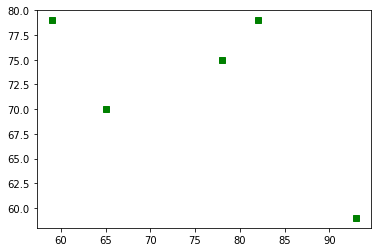

In [26]:
# in a alternative universe, the exam scores are a bit different:
grades = pd.DataFrame({"HomeworkAvg": [65, 78, 93, 59, 82],
                       "FinalExam": [70, 75, 59, 79, 79]})
plt.plot(grades["HomeworkAvg"], grades["FinalExam"], "gs")

plt.show()

**Sensitivity Analysis:** How likely will the relationship remain positive if the exam scores changes a little bit?

In [38]:
grades

,HomeworkAvg,FinalExam,Prediction
0,65,70,67.983180
1,78,75,78.754205
2,93,59,91.182311
3,59,79,63.011937
4,82,79,82.068367


In [39]:
# Let's say Student 1 took 5 similar tests, and 
# his scores are 70, 68, 75, 74, 69.
# How can we measure the randomness?

# Student 2 took 5 tests and scores are 90, 60, 75, 89, 62

# variance: average of squares of differences between values and the mean
# variance = average of (x_i - x_mean) ** 2
# standard deviation: square root of variance

# For linear regression, let's estimate the variance of the error
grades = pd.DataFrame({"HomeworkAvg": [65, 78, 93, 59, 82],
                       "FinalExam": [70, 75, 95, 64, 79]})
grades["Prediction"] = lm.fittedvalues
variance = np.var(grades["FinalExam"] - grades["Prediction"])
std = np.std(grades["FinalExam"] - grades["Prediction"])
print(variance)
print("Standard deviation:", std)

8.625501899077593
Standard deviation: 2.936920478848141


**Sensitivity Analysis:** What is the range of each parameter value if the exam scores changes a little bit?

In [56]:
# Let's add some random perturbations to the original datasets.
new_grades = pd.DataFrame({"HomeworkAvg": [65, 78, 93, 59, 82],
                       "FinalExam": [70, 75, 95, 64, 79]})
new_grades['FinalExam'] = new_grades['FinalExam'] + np.random.randn(5) * std

new_lm = smf.ols("FinalExam ~ HomeworkAvg", new_grades).fit()
new_lm.params

Intercept      12.677393
HomeworkAvg     0.821071
dtype: float64

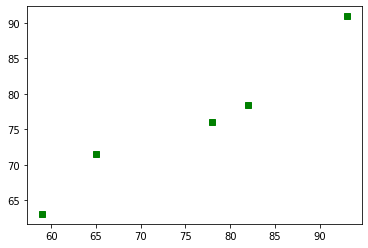

In [51]:
plt.plot(new_grades["HomeworkAvg"], new_grades["FinalExam"], "gs")

plt.show()

**Summary:** How did we create the linear regression method?

# Predict Boston Housing Prices
As an example, we will look at a dataset about Boston housing prices in the 1970s.

In [1]:
# Load the dataset from the sci-kit learn package.
from sklearn.datasets import load_boston
boston_dict = load_boston()

In [2]:
# Display the variable boston_dict:
boston_dict

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
# Display the list of keys
boston_dict.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
# Display the value linked to "feature_names"
boston_dict["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
# This dictionary contains description of the data set
print(boston_dict["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

To better analyze the data, let's convert it into a **Pandas data frame**.

In [6]:
import pandas as pd

boston = pd.DataFrame(data=boston_dict.data)

In [7]:
# Display the data frame
boston

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
# There are no column names, so let's repeat that command, but telling Pandas 
# that the column names are in feature_names
boston = pd.DataFrame(data=boston_dict.data,
                      columns=boston_dict.feature_names)

boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [9]:
# So far we have created a data frame with all independent variables.
# Let's also add the price data to the data frame.
boston["price"] = boston_dict.target 

# Display the first several rows to verify that the new column was added correctly.
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:xlabel='RM', ylabel='price'>

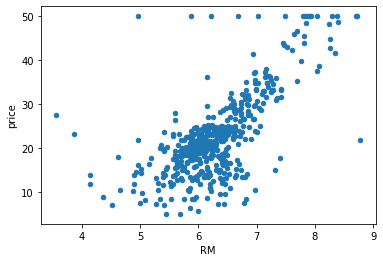

In [10]:
# Let look at the relationship between the price and the average number of rooms (RM)
boston.plot.scatter(x="RM", y="price")

There seems to be a linear relationship between RM and price. How can we find a line that best describes this relation?
- What is the mathematcial expression of a straight line?
- Given two different lines, how do we tell which one fits the data better?
- How to find the line that best fits the data?

Let's perform linear regression using the `statsmodel` library.

In [11]:
import statsmodels.formula.api as smf

lm = smf.ols('price ~ RM',boston).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 30 Jun 2021   Prob (F-statistic):           2.49e-74
Time:                        21:41:19   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpreting the Linear Regression Summary
- Dep. Variable
- Method
- Date and Time
- No. Observations
- Df Residuals: The degree of freedom
- Df Model: The number of dependent variables
- **R-squared**: How much of the changes dependent variables is explained by the changes in independent variables
- **Adjusted R-squared**: A better performance measure for multiple dependent variables
- **Prob(F statistic)**: How likely did this trend occur by pure luck?
- **coef**: Estimates of model coefficients
- **P > |t|**: How likely the true value of this coefficient is actually zero? This value is call the **p-value**.
- [0.025, 0.975]: The confidence interval of the coefficient


In [ ]:
# Build a linear model on price and crime rate (CRIM)
# Is this a stronger relationship?


In [ ]:
# Visualize the regression line with data
import seaborn as sns

sns.regplot(y="price", x="RM", data=boston, fit_reg = True)

## Is Linear Regression a Good Choice?

The **residuals** are the difference between the actual value of price and the value predicted by the regression line, for each row of the data. If the linear model is a good fit, the histogram should look like a **normal distribution**.


In [12]:
# Display the residuals
lm.resid

0     -1.175746
1     -2.174021
2      3.971968
3      4.374062
4      5.817848
         ...   
501   -2.939584
502   -0.434286
503   -4.925691
504   -5.169108
505   -8.315096
Length: 506, dtype: float64

<AxesSubplot:>

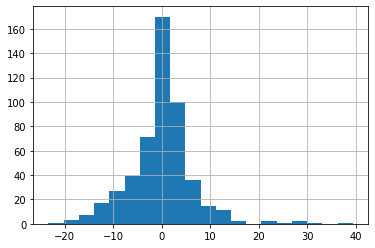

In [13]:
lm.resid.hist(bins = 20)

In [ ]:
lm

Another good way to check the model performance is to visualize the predicted prices with the true prices.

In [ ]:
# Extract model predictions on the data
lm.fittedvalues

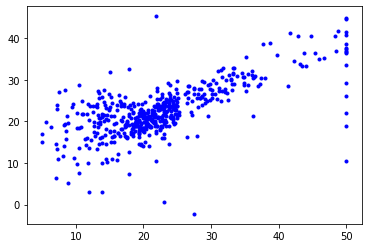

In [15]:
import matplotlib.pyplot as plt
# Draw a scatter plot with the true price as the x coordinate and the 
# predicted price as the y coordinate.
plt.plot(boston['price'], lm.fittedvalues, 'b.')

**Discussion**
- If all the prices were predicted correctly, what would this plot have looked like?
- Where does the linear model fail badly?

# Exercise

Build a linear model to describe how pupil-teacher ration (PTRATIO) affects the housing prices.

- Perform linear regression and find the expression of the regression line.
- Plot the line together with the data
- Access whether the linear model properly describes the relationship:
    - Is the R-squared value close to 1?
    - Are the p-values of coefficients close to zero?
    - Is the histogram of the residuals close to a normal distribution?
    - Is the true vs. prediction plot close to a diagonal line?

# Homework \#3

**Smart Air-Conditioning by Programmable thermostats**

No one wants to spend more money than necessary on heating and air conditioning. But, everyone wants to be comfortable and cozy while at home. The development of programmable thermostats was an initial effort to assist in reducing energy costs. With a programmable thermostat, you can manually preset a schedule of temperature increases and decreases for weekdays and weekends, and day and night periods, to keep your home cool or warm when needed, but save energy when not needed. 

Suppose that you are designing a next-generation smart air-conditioning system for your house. Describe how this system can manage the home temperature automatically so that you and your family can live comfortably while the energy cost get reduced.

- Search for information on how existing smart air-conditioning system can achieve.
- Describe what information your systems needs know.
- Describe how your system determines the home temperature given the information it collects.
- Spend **no more than 2 hours** on this assignment.
- Write an essay to report your design. Submit to Liang.Zhao1@lehman.cuny.edu before **Thursday, June 24th at 11:59PM**

    

# Homework \# 4: Gas Price Prediction

Since gas prices can fluctuate significantly from week to week, consumers would like to predict the gas price in the coming week so that they can determine whether to fill up the gas tank now or later.

Please develop a model that a consumer living in New York could use to predict the gas price of the next week. You can use the data from the following websites or any other publicly available data such as weather data, economic data, world events, etc.
- Weekly gas prices: http://www.eia.gov/dnav/pet/pet_pri_gnd_a_epmr_pte_dpgal_w.htm
- Weekly crude oil prices:http://www.eia.gov/dnav/pet/pet_pri_spt_s1_w.htm

**Use the 2020 data to build your model and the 2021 data to test your model.** If you find it difficult to handle the data using Python, you can use Microsoft Excel instead.

Here is a list of references on creating a prediction model and handle data using Python:
- [Python for Data Analysis](https://bedford-computing.co.uk/learning/wp-content/uploads/2015/10/Python-for-Data-Analysis.pdf)
- [Lecture Notes on Regression](https://stat.ethz.ch/education/semesters/ss2016/regression/Regression.pdf)

Please submit a paper including problem analysis, model construction, and performance analysis to Liang.Zhao1@lehman.cuny.edu before **Tuesday, June 29th at 11:59PM**


In [57]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load gas prices
url = "https://www.eia.gov/dnav/pet/hist_xls/EMM_EPMR_PTE_SNY_DPGw.xls"
gas = pd.read_excel(url, sheet_name="Data 1", skiprows=2,
                    names=["Date", "Price"])
gas["Date"] = pd.to_datetime(gas["Date"])
gas = gas[gas["Date"] > datetime(2020, 1, 1)]
gas

,Date,Price
1022,2020-01-06,2.649
1023,2020-01-13,2.651
1024,2020-01-20,2.630
1025,2020-01-27,2.599
1026,2020-02-03,2.562
...,...,...
1094,2021-05-24,2.988
1095,2021-05-31,2.983
1096,2021-06-07,3.010
1097,2021-06-14,3.057


In [58]:
# Load crude oil prices
url = "https://www.eia.gov/dnav/pet/hist_xls/EER_EPMRU_PF4_Y35NY_DPGw.xls"
crude = pd.read_excel(url, sheet_name="Data 1", skiprows=2,
                    names=["Date", "Price"])
crude["Date"] = pd.to_datetime(crude["Date"])
crude = crude[crude["Date"] > datetime(2020, 1, 1)]
crude

,Date,Price
1752,2020-01-03,1.768
1753,2020-01-10,1.727
1754,2020-01-17,1.694
1755,2020-01-24,1.614
1756,2020-01-31,1.545
...,...,...
1824,2021-05-21,2.105
1825,2021-05-28,2.106
1826,2021-06-04,2.156
1827,2021-06-11,2.162


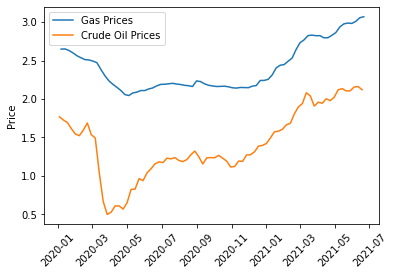

In [59]:
plt.plot(gas["Date"], gas["Price"], label="Gas Prices")
plt.plot(crude["Date"], crude["Price"], label="Crude Oil Prices")
plt.ylabel("Price")
plt.xticks(rotation = 45)
plt.legend()
plt.show()